<a href="https://colab.research.google.com/github/kbdharun/ML-Lab/blob/main/lab5/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on multiple datasets

**Reference**: <https://www.kaggle.com/code/rahulrajpandey31/logistic-regression-from-scratch-iris-data-set>

## Logistic Regression on Iris dataset

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
from sklearn.datasets import load_iris #Import Iris dataset
iris = load_iris()

In [42]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

df['species'] = iris.target_names[df['target'].astype(int)]


In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


<ipython-input-46-34e8937451df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".0%")


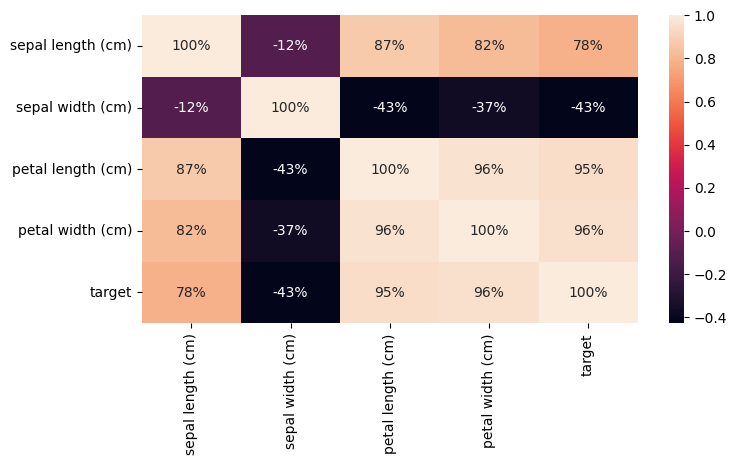

In [46]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

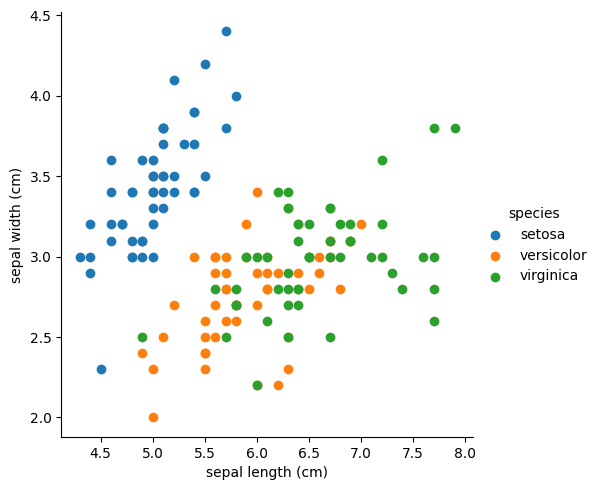

In [47]:
sns.FacetGrid(df, hue="species", height=5).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

In [56]:
# Splitting data
X = df.iloc[:, 0:4]
Y = df["species"]

In [58]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=0)

In [59]:
# Fitting Logistic Regression to the Training set
log = LogisticRegression()
log.fit(X_train, Y_train)

# Predicting the test result
prediction = log.predict(X_test)

# Test accuracy of the result (Creation of Confusion matrix)
conf_matrix = metrics.confusion_matrix(Y_test, prediction)
accuracy = metrics.accuracy_score(Y_test, prediction)

print('Confusion Matrix:\n', conf_matrix)
print('Accuracy of Logistic Regression:', accuracy)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy of Logistic Regression: 0.9736842105263158


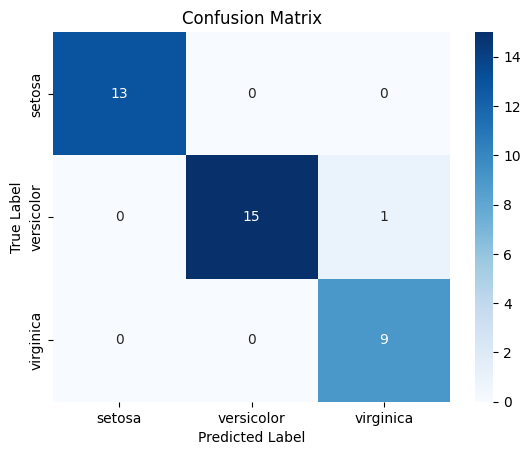

In [60]:
# Visualizing the test set result
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

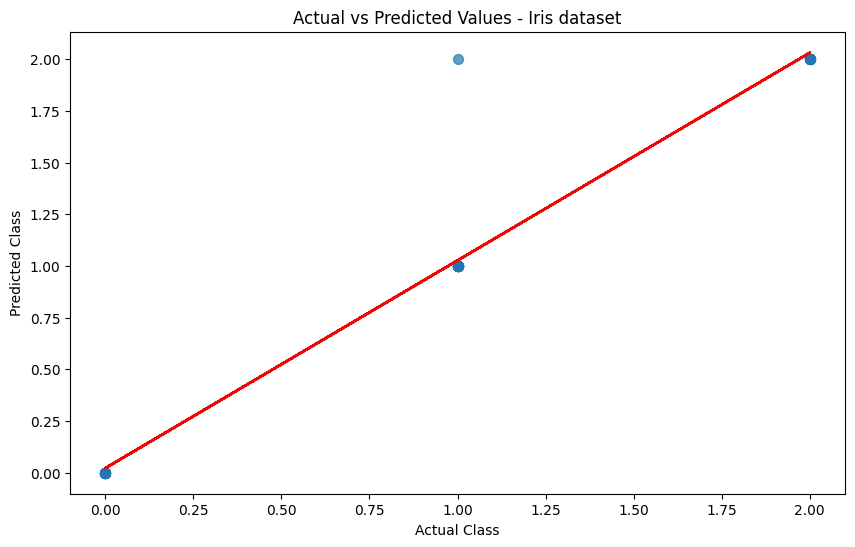

In [81]:
# Convert labels to numeric values
Y_test_numeric_iris = pd.Categorical(Y_test).codes
prediction_numeric_iris = pd.Categorical(prediction).codes

# Plotting actual vs predicted values with regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(Y_test_numeric_iris, prediction_numeric_iris, s=50, alpha=0.7)

# Fit a linear regression line
m_iris, b_iris = np.polyfit(Y_test_numeric_iris, prediction_numeric_iris, 1)
plt.plot(Y_test_numeric_iris, m_iris * Y_test_numeric_iris + b_iris, color='red')

plt.title('Actual vs Predicted Values - Iris dataset')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()


## Logistic Regression on Wine dataset

In [65]:
from sklearn.datasets import load_wine  # Import Wine dataset
wine = load_wine()

In [67]:
df_wine = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])
df_wine['class'] = wine.target_names[df_wine['target'].astype(int)]

In [68]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,class_0


In [69]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [70]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<ipython-input-72-0b074188c15b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_wine.corr(), annot=True, fmt=".0%")


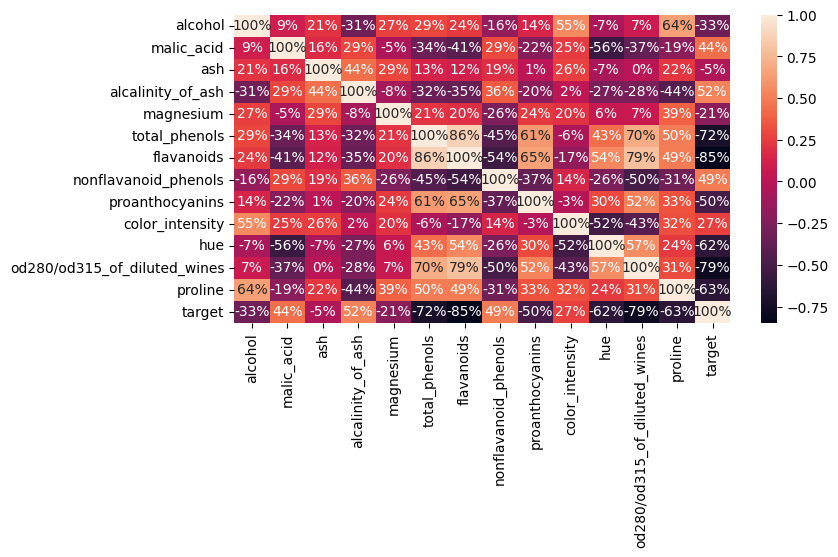

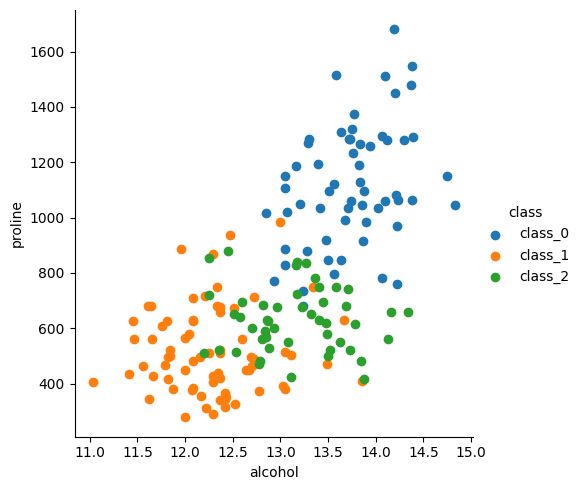

In [72]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_wine.corr(), annot=True, fmt=".0%")
plt.show()
sns.FacetGrid(df_wine, hue="class", height=5).map(plt.scatter, "alcohol", "proline").add_legend()

In [73]:
# Splitting data
X_wine = df_wine.iloc[:, :-2]  # Exclude 'target' and 'class' columns
Y_wine = df_wine["class"]

In [74]:
# Feature scaling
scaler_wine = StandardScaler()
X_scaled_wine = scaler_wine.fit_transform(X_wine)
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_scaled_wine, Y_wine, test_size=0.25, random_state=0)

In [75]:
# Fitting Logistic Regression to the Training set
log_wine = LogisticRegression()
log_wine.fit(X_train_wine, Y_train_wine)

# Predicting the test result
prediction_wine = log_wine.predict(X_test_wine)

# Test accuracy of the result (Creation of Confusion matrix)
conf_matrix_wine = metrics.confusion_matrix(Y_test_wine, prediction_wine)
accuracy_wine = metrics.accuracy_score(Y_test_wine, prediction_wine)

print('Confusion Matrix:\n', conf_matrix_wine)
print('Accuracy of Logistic Regression on Wine dataset:', accuracy_wine)

Confusion Matrix:
 [[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
Accuracy of Logistic Regression on Wine dataset: 1.0


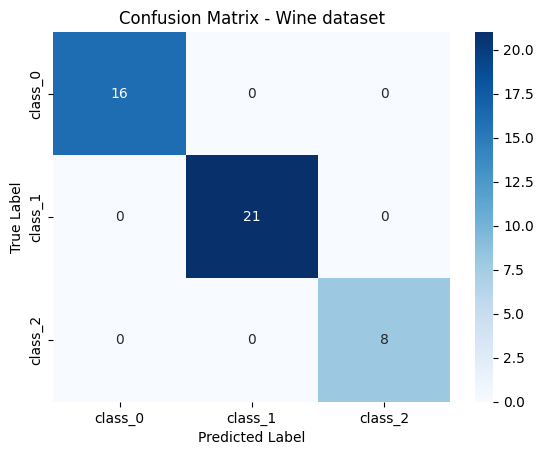

In [76]:
# Visualizing the test set result
sns.heatmap(conf_matrix_wine, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Wine dataset')
plt.show()

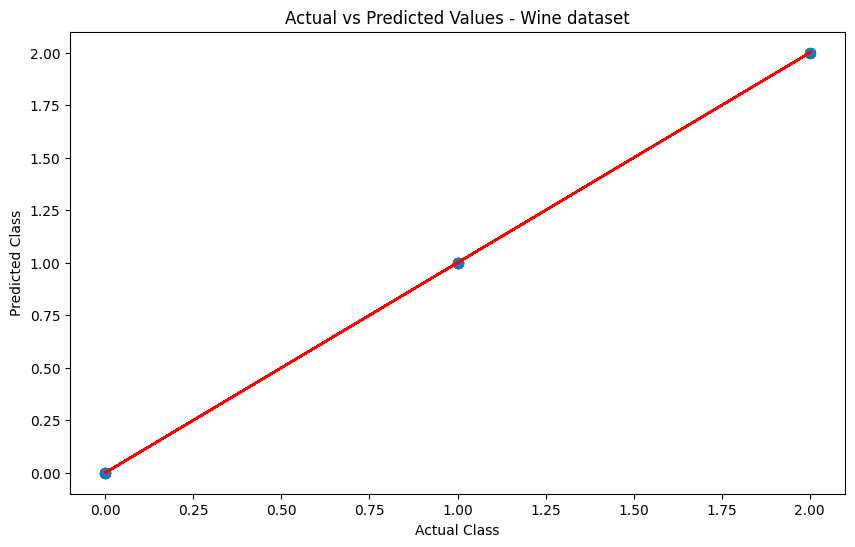

In [80]:
# Convert labels to numeric values
Y_test_numeric = pd.Categorical(Y_test_wine).codes
prediction_numeric = pd.Categorical(prediction_wine).codes

# Plotting actual vs predicted values with regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(Y_test_numeric, prediction_numeric, s=50, alpha=0.7)

# Fit a linear regression line
m, b = np.polyfit(Y_test_numeric, prediction_numeric, 1)
plt.plot(Y_test_numeric, m * Y_test_numeric + b, color='red')

plt.title('Actual vs Predicted Values - Wine dataset')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()
